## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               # include image preprocess tools
from torchvision.datasets import CIFAR10        # for loading images from Pytorch CIFAR
from torch.utils.data import DataLoader
import detectors
import timm
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.temperature_scaling import ModelWithTemperature

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("vgg16_bn_cifar10", pretrained=True)
model = model.to(device)

# reprocess the images from CIFAR
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

Files already downloaded and verified
Before temperature - NLL: 0.418, ECE: 0.064
Optimal temperature: 4.903
After temperature - NLL: 0.917, ECE: 0.467


ModelWithTemperature(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, pa

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


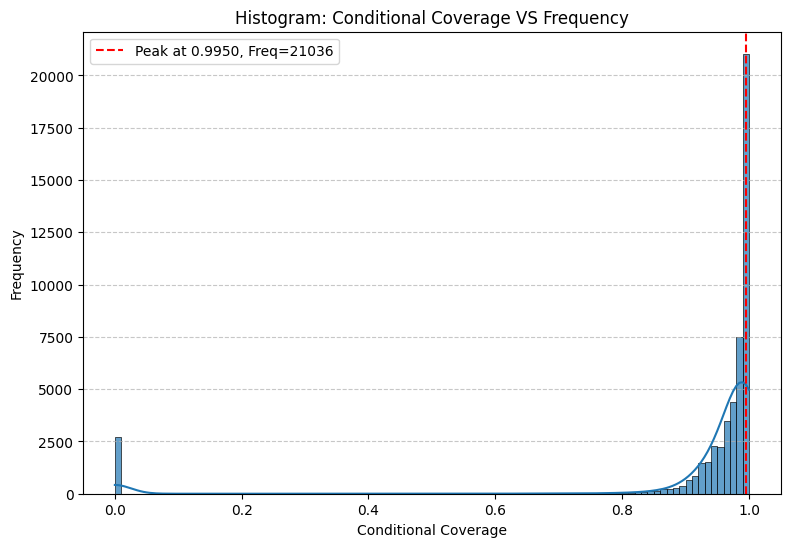

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.05)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9249 ± 0.0037
Final Average Prediction Set Size: 1.03 ± 0.01
Final Average Coverage: 0.9450 ± 0.0055
Final Average Real Probability: 0.9178 ± 0.0054


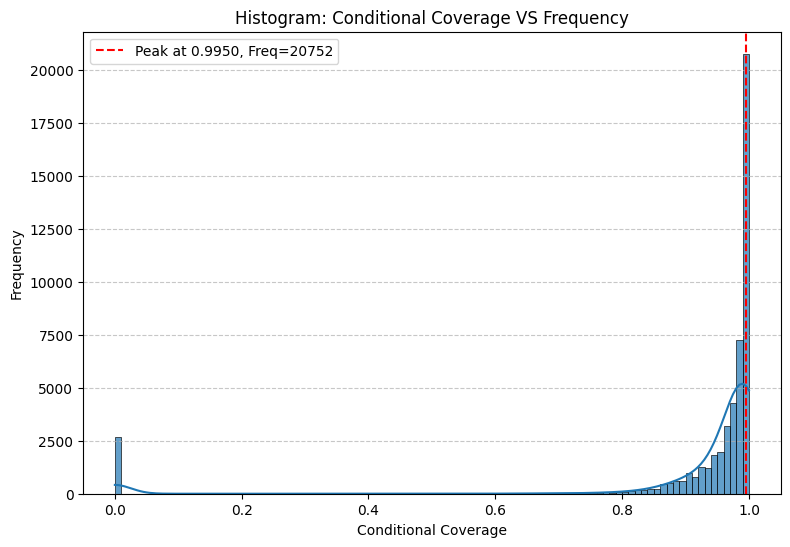

20752 (41.50%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9277 ± 0.0030
Final Average Prediction Set Size: 1.01 ± 0.01
Final Average Coverage: 0.9504 ± 0.0033
Final Average Real Probability: 0.9204 ± 0.0032


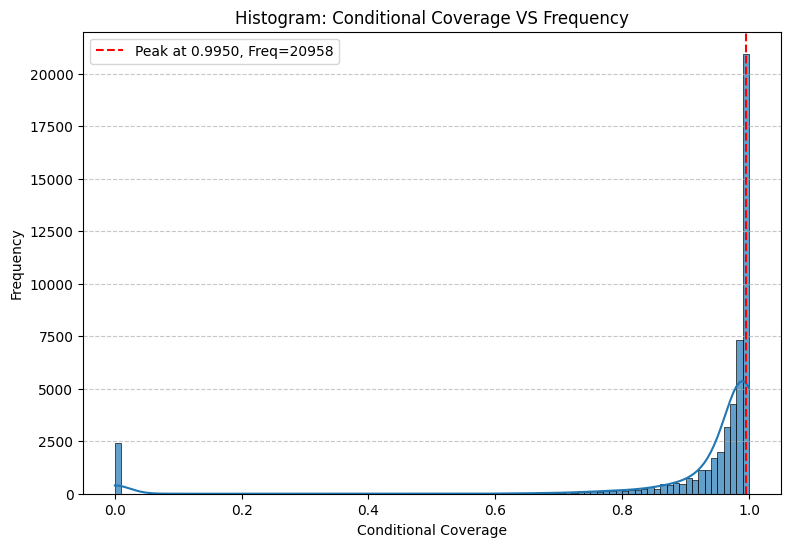

20958 (41.92%) samples reached the peak conditional coverage at 0.9950


In [8]:
saps_cifar10h_hist(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05)

## Model Test

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4931 ± 0.0031
Final Average Prediction Set Size: 1.40 ± 0.02
Final Average Coverage: 0.9493 ± 0.0030
Final Average Real Probability: 0.9219 ± 0.0030


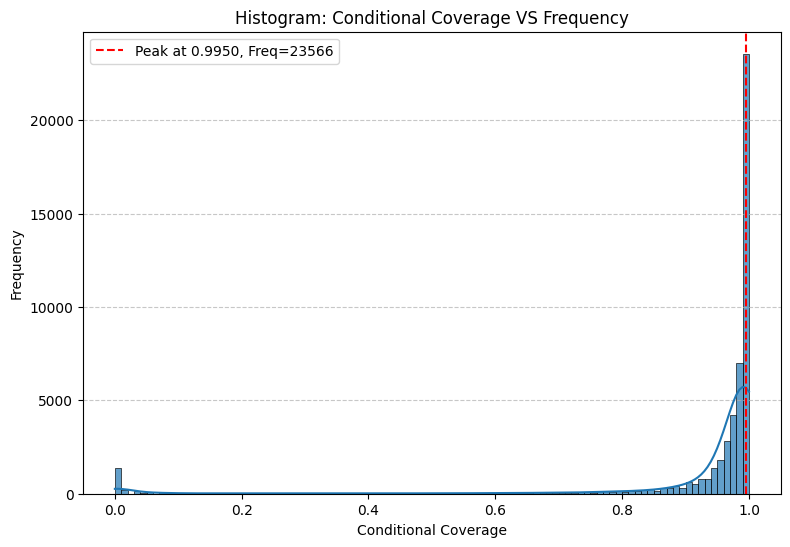

23566 (47.13%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4931 ± 0.0031
Final Average Prediction Set Size: 1.40 ± 0.02
Final Average Coverage: 0.9493 ± 0.0030
Final Average Real Probability: 0.9219 ± 0.0030


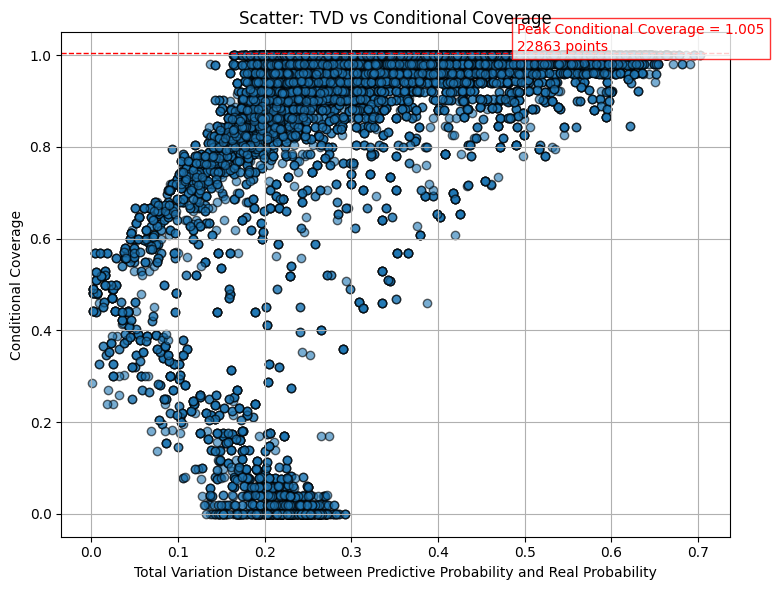

Peak Conditional Coverage = 1.005, with 22863 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.43954']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.48486']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.44596']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26103', '0.22536']
  Real Probability Set      : ['0.01961', '0.68627']
Sample 2:
  Predictive Probability Set: ['0.26788', '0.17155']
  Real Probability Set      : ['0.00000', '0.78000']
Sample 3:
  Predictive Probability Set: ['0.21838', '0.18583', '0.11421']
  Real Probability Set      : ['0.00000', '0.52000', '0.28000']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: [

In [7]:
aps_cifar10h_scatter(model, dataset, device, num_runs=10, alpha=0.05)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5049 ± 0.0038
Final Average Prediction Set Size: 1.27 ± 0.02
Final Average Coverage: 0.9503 ± 0.0027
Final Average Real Probability: 0.9216 ± 0.0031


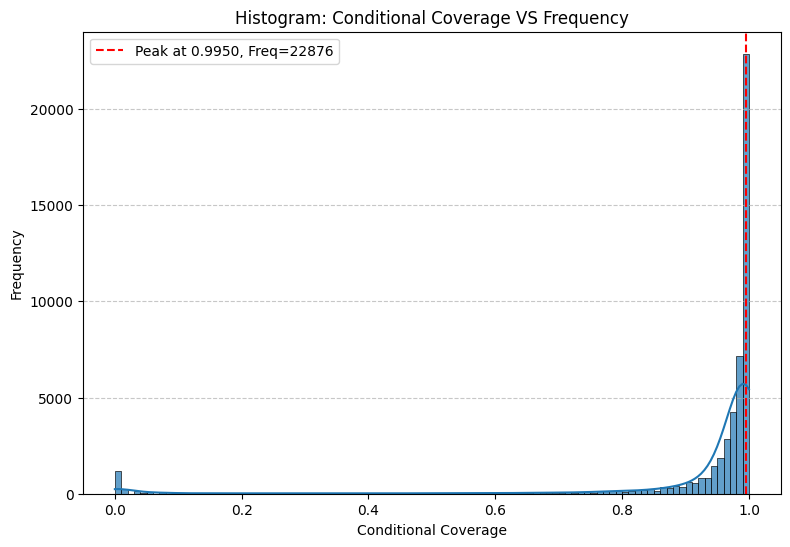

22876 (45.75%) samples reached the peak conditional coverage at 0.9950


In [5]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5049 ± 0.0038
Final Average Prediction Set Size: 1.27 ± 0.02
Final Average Coverage: 0.9503 ± 0.0027
Final Average Real Probability: 0.9216 ± 0.0031


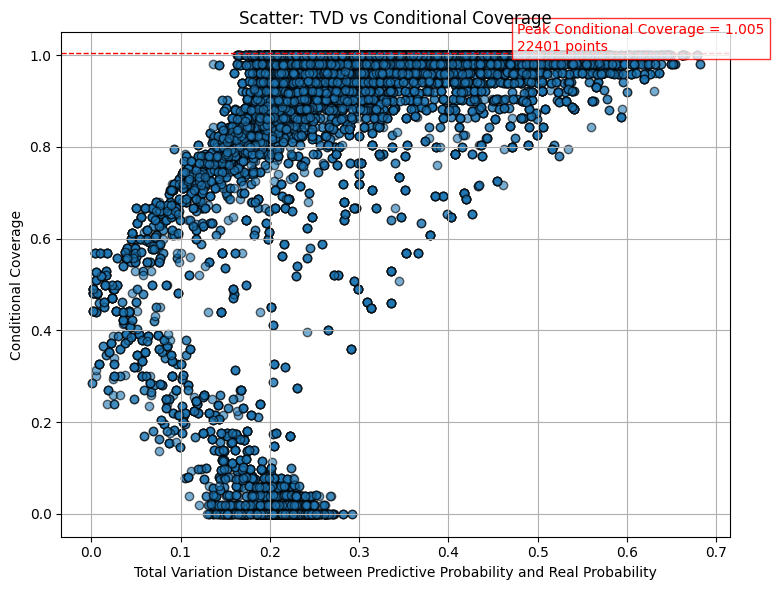

Peak Conditional Coverage = 1.005, with 22401 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.23368', '0.20618']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.21433', '0.19223']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.45301']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.33302', '0.15167']
  Real Probability Set      : ['0.01961', '0.50980']
Sample 2:
  Predictive Probability Set: ['0.35357', '0.12523']
  Real Probability Set      : ['0.03922', '0.56863']
Sample 3:
  Predictive Probability Set: ['0.34303', '0.12748']
  Real Probability Set      : ['0.03922', '0.52941']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predict

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5414 ± 0.0078
Final Average Prediction Set Size: 1.25 ± 0.02
Final Average Coverage: 0.9519 ± 0.0037
Final Average Real Probability: 0.9231 ± 0.0039


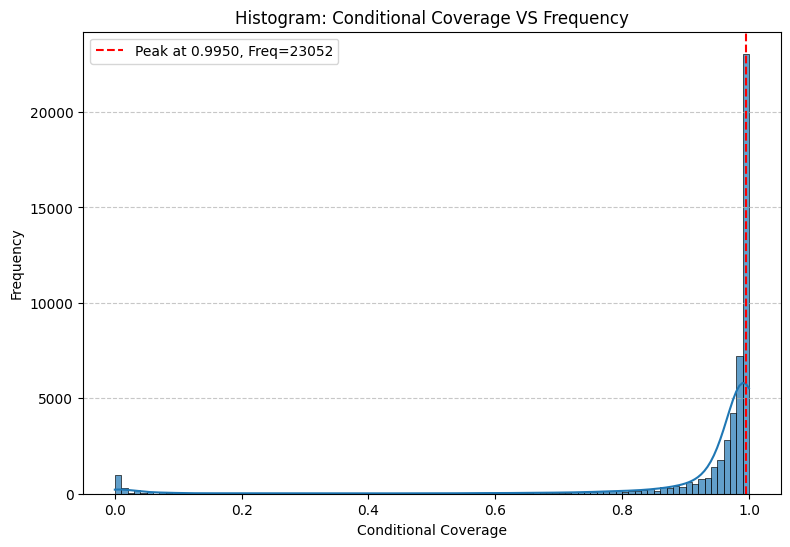

23052 (46.10%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5414 ± 0.0078
Final Average Prediction Set Size: 1.25 ± 0.02
Final Average Coverage: 0.9519 ± 0.0037
Final Average Real Probability: 0.9231 ± 0.0039


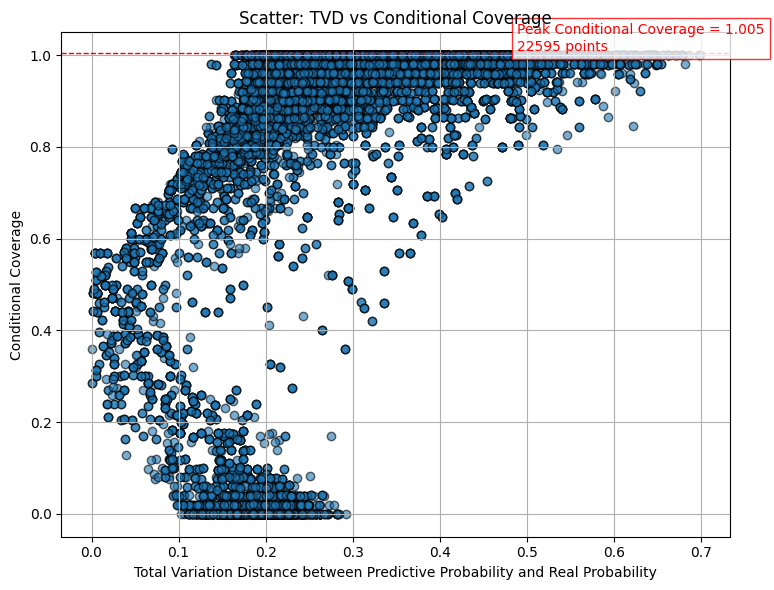

Peak Conditional Coverage = 1.005, with 22595 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.42972']
  Real Probability Set      : ['0.01923']
Sample 2:
  Predictive Probability Set: ['0.45704']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.42716']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.21971', '0.15165']
  Real Probability Set      : ['0.00000', '0.78431']
Sample 2:
  Predictive Probability Set: ['0.27890', '0.19226']
  Real Probability Set      : ['0.78000', '0.02000']
Sample 3:
  Predictive Probability Set: ['0.27890', '0.19226']
  Real Probability Set      : ['0.78000', '0.02000']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.29180', '0.20451']


In [9]:
saps_cifar10h_scatter(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05)